<a href="https://colab.research.google.com/github/muhamadfarrelrizqullah/PCVK_Ganjil_2023/blob/main/Week12_Mfarrel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Praktikum 12 PCVK**


1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama "Week12.ipynb". Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet). Tampilkan seperti pada contoh berikut. Perhatikan pada hasil face detection dibawah ini. Secara keseluruhan, face detection dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah bermasker, atau wajah yang berukuran kecil (solvay).

In [ ]:
def recognitions(pathArray, cascade_paths):
    for i, imagePath in enumerate(pathArray):
        normalImage = cv.imread(imagePath, 0)
        faci = cv.imread(imagePath, 0)

        img_height, img_width = normalImage.shape[:2]

        fig, axes = plt.subplots(1, len(cascade_paths) * 2, figsize=(img_width / 100, img_height / 100))  # Adjust scaling factor if needed

        for j, cascade_path in enumerate(cascade_paths):
            face_cascade = cv.CascadeClassifier(cascade_path)

            roi_wajah = face_cascade.detectMultiScale(normalImage, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

            # Menampilkan normalImage di kolom pertama
            axes[j * 2].imshow(normalImage, cmap='gray')
            axes[j * 2].set_title(f'Normal Image, Cascade {j+1}')

            # Menampilkan faci dengan kotak bounding di wajah di kolom kedua
            for (x, y, w, h) in roi_wajah:
                cv.rectangle(faci, (x, y), (x + w, y + h), (255, 255, 255), 3)

            axes[j * 2 + 1].imshow(faci, cmap='gray')
            axes[j * 2 + 1].set_title(f'Faci Image, Cascade {j+1}')

        # Menampilkan plot
        plt.tight_layout()
        plt.show()

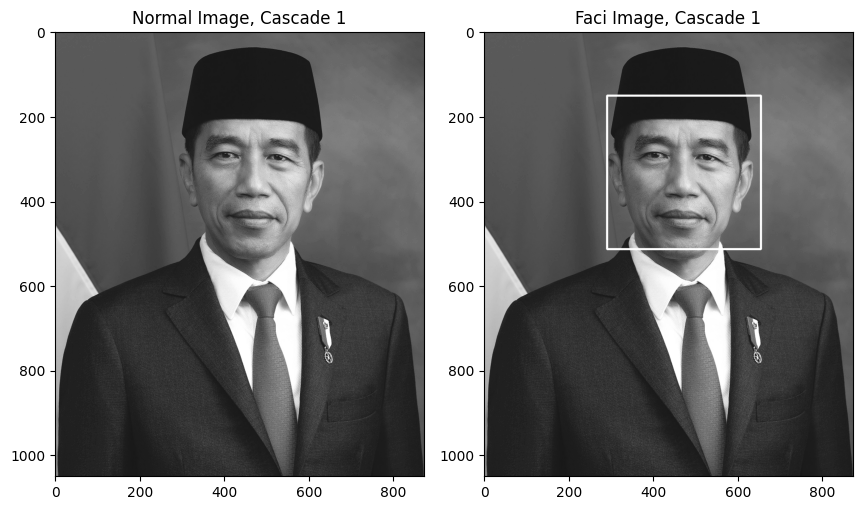

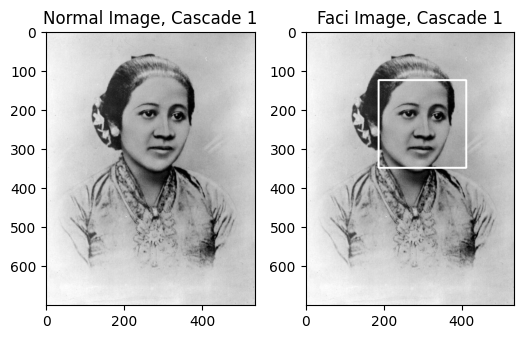

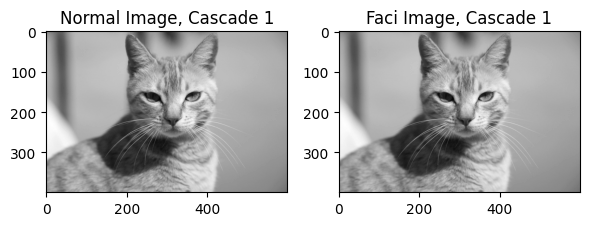

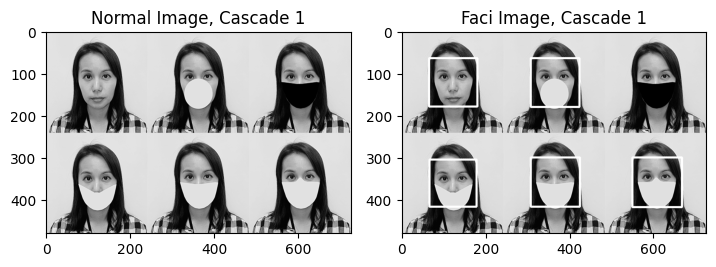

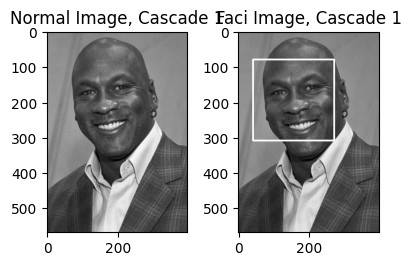

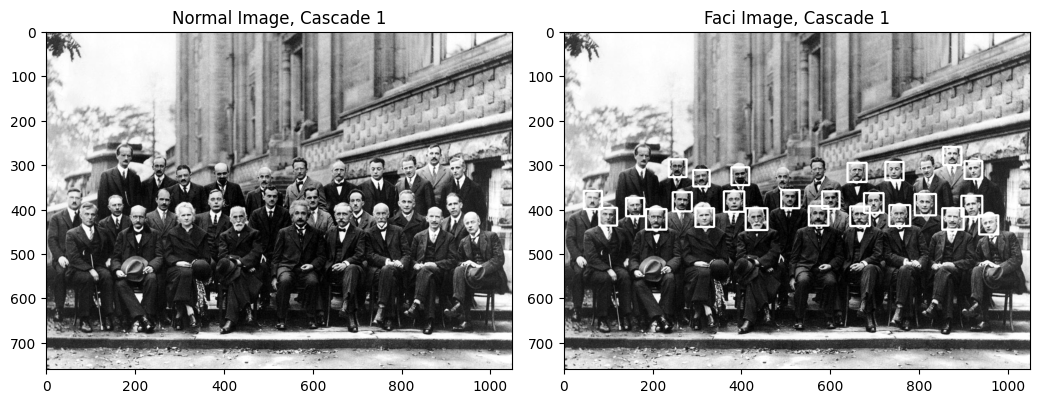

In [ ]:
import os

path=['/content/drive/MyDrive/Pcvk/jokowi.jpg','/content/drive/MyDrive/Pcvk/kartini.jpg','/content/drive/MyDrive/Pcvk/mycat.jpg','/content/drive/MyDrive/Pcvk/mask.png', '/content/drive/MyDrive/Pcvk/mjordan.jpg', '/content/drive/MyDrive/Pcvk/solvayconf.jpg']
cascade=['/content/drive/MyDrive/Pcvk/haarcascade_frontalface_alt.xml']

recognitions(path,cascade)

3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya seperti gambar berikut. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.

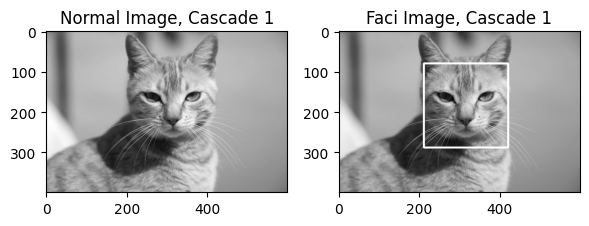

In [ ]:
path=['/content/drive/MyDrive/Pcvk/mycat.jpg']
cascade=['/content/drive/MyDrive/Pcvk/haarcascade_frontalcatface.xml']

recognitions(path,cascade)

4. Cobakan juga untuk eyes detection pada gambar “Jokowi.jpg”, sehingga menghasilkan gambar seperti berikut.

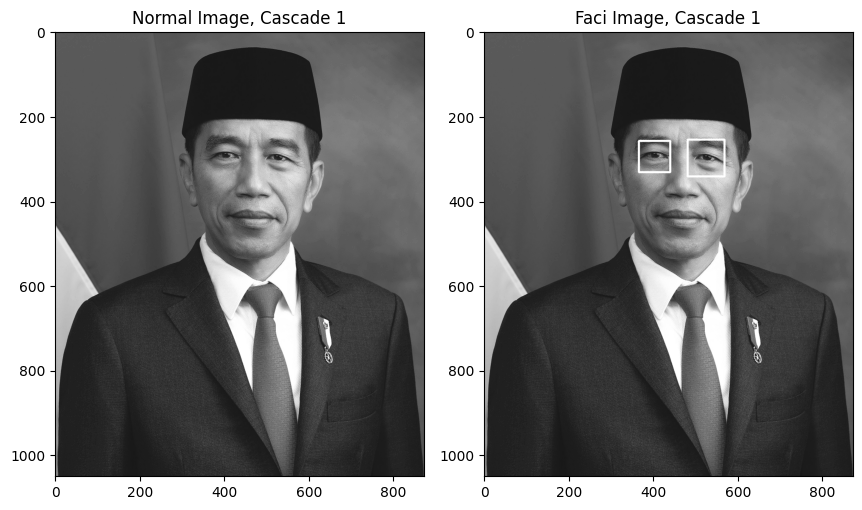

In [ ]:
path=['/content/drive/MyDrive/Pcvk/jokowi.jpg']
cascade=['/content/drive/MyDrive/Pcvk/haarcascade_eye.xml']

recognitions(path,cascade)

5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YiWh7QvVH60

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

  # function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

# initialize the Haar Cascade face detection model
face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Pcvk/haarcascade_frontalface_alt.xml')
def take_photo(filename='zalna.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

    # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv.imwrite(filename, img)

  return filename

try:
  filename = take_photo('Capture.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "Status:";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '' +
          'When finished, click here or on the video to stop this demo';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

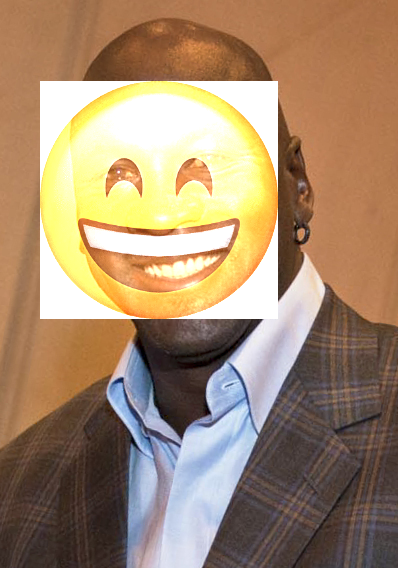

In [9]:
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Pcvk/haarcascade_frontalface_default.xml')

mjordan = cv2.imread('/content/drive/MyDrive/Pcvk/mjordan.jpg')
smile = cv2.imread('/content/drive/MyDrive/Pcvk/smile.png', -1)

mjordan_gray = cv2.cvtColor(mjordan, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(mjordan_gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) > 0:
    x, y, w, h = faces[0]
    smile_resized = cv2.resize(smile, (w, h))
    roi = mjordan[y:y+h, x:x+w]
    mjordan[y:y+h, x:x+w] = cv2.addWeighted(roi, 1, smile_resized, 1, 0)

cv2_imshow(mjordan)

7. Lakukan deteksi wajah dengan menggunakan bounding box berwarna hitam, deteksi mata menggunakan bounding box berwarna putih, dan deteksi mata kanan menggunakan bounding box berwarna merah. Gunakan gambar “people.jpg” untuk mengerjakan soal pada nomor ini. Berikut contoh keluarannya.

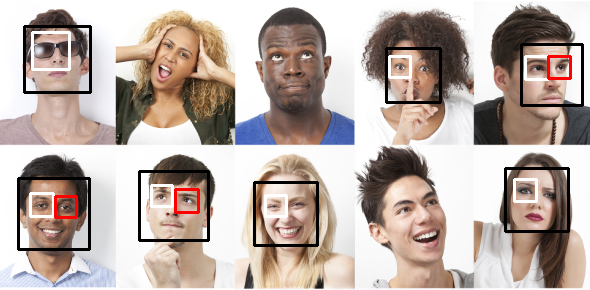

In [ ]:
from google.colab.patches import cv2_imshow

img_people = cv.imread('/content/drive/MyDrive/Pcvk/people.jpg')

face_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Pcvk/haarcascade_frontalface_alt.xml')

eye_cascade = cv.CascadeClassifier('/content/drive/MyDrive/Pcvk/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img_people, scaleFactor=1.3, minNeighbors=5)

for (x, y, w, h) in faces:

    cv2.rectangle(img_people, (x, y), (x+w, y+h), (0, 0, 0), 2)


    roi_gray = img_people[y:y+h, x:x+w]
    roi_color = img_people[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex, ey, ew, eh) in eyes:

        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 2)

        if ex + ew/2 > w/2:

            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 0, 255), 2)

cv2_imshow(img_people)